# Relation between Uniform and Exponential Distributions 

In this section, I will demonstrate a simple relationship between the uniform distribution and the exponential distribution.

We define a random variable $Y$ as:

$$
Y := \min\{X_i : 1 \leq i \leq k\} 
$$

where $X_1, \ldots, X_k \sim \text{Unif}[0, t]$, with $k = \lambda t$.

The key result is that $Y$ approaches $\text{Exponential}(\lambda)$ distribution as $t$ becomes sufficiently large.

## Proof

To find the probability density function of $Y$, $f_Y(y)$, we first calculate its cumulative distribution function (CDF), $F_Y(y)$:

$$
\begin{eqnarray*}
F_Y(y) 
& = & P(Y \leq y)\\
& = & 1 - P(Y > y) \\
& = & 1 - P(\min\{X_1, \ldots, X_k\} > y) \\
& = & 1 - P(X_1 > y) P(X_2 > y) \cdots P(X_k > y) \\
& = & 1 - \left(\frac{t-y}{t}\right)^k \\
& = & 1 - \left((1 - \frac{y}{t})^t\right)^\lambda \\
& \rightarrow & 1 - e^{-\lambda y} \quad \text{as} \quad t \rightarrow \infty
\end{eqnarray*}
$$

Differentiating the CDF, we obtain the probability density function:

$$
f_Y(y) = \lambda e^{-\lambda y}
$$

Hence, $Y$ indeed approaches $\text{Exponential}(\lambda)$ distribution as $t$ becomes large.

## Verification through Simulation

We will now verify this result using a simple simulation.


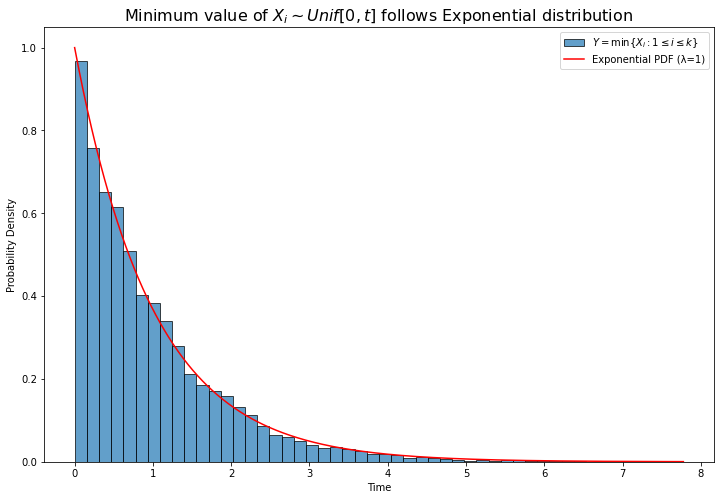

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters (constants)
LAMBDA_RATE = 1
TIME_INTERVAL = 40
K = LAMBDA_RATE * TIME_INTERVAL
NUM_SIMULATIONS = 10000

# Gathering the first arrival times by simulation
first_arrival_times = []
for _ in range(NUM_SIMULATIONS):
    min_X = np.random.uniform(0, TIME_INTERVAL, K).min()
    
    # Add the first arrival time to the list
    first_arrival_times.append(min_X)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram of first arrival times
ax.hist(first_arrival_times, bins=50, edgecolor='black', alpha=0.7, density=True, label='$Y=\min\{X_i :1\leq i \leq k\}$')

# Plot the PDF of exponential distribution (λ=1)
x = np.linspace(0, max(first_arrival_times), 1000)
pdf_exponential = expon.pdf(x, scale=1/LAMBDA_RATE)
ax.plot(x, pdf_exponential, color='red', label='Exponential PDF (λ=1)')

# Labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Probability Density')
ax.set_title('Minimum value of $X_i \sim Unif[0,t]$ follows Exponential distribution', fontsize=16)
ax.legend()

# Display the plot
plt.show()
